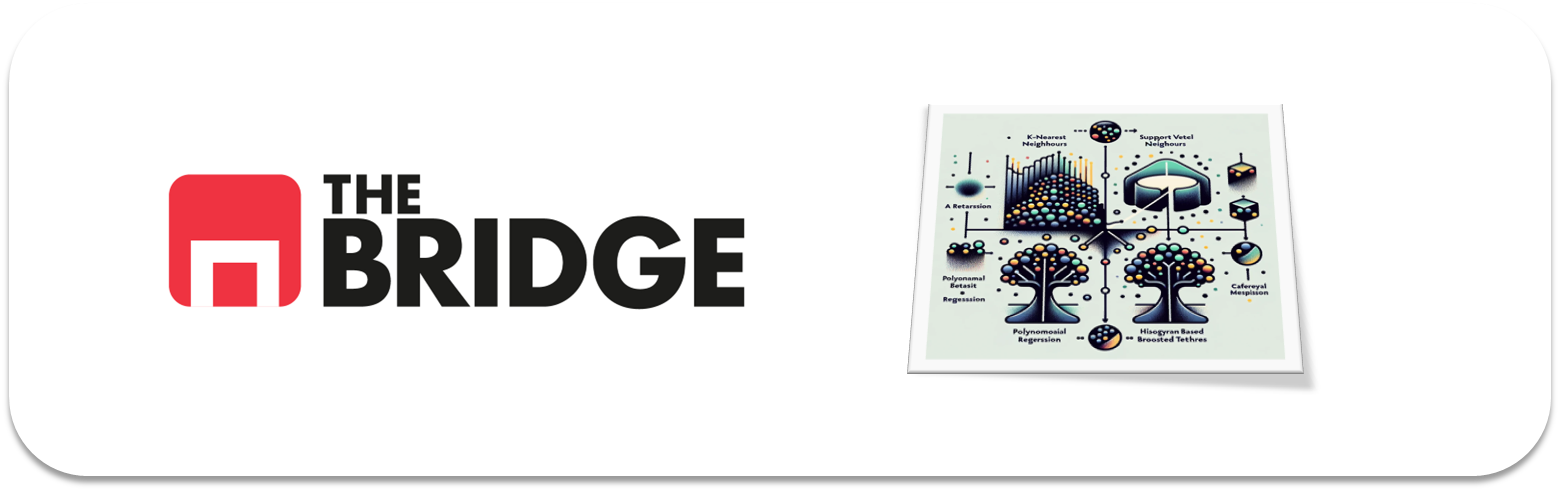

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [22]:
import pandas as pd
import numpy as np

from toolbox_ML import *
from bootcampviztools import *

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV




### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [23]:
import pandas as pd

# Cargamos el dataset
data = pd.read_csv("data/wines_dataset.csv")

# Mostramos las primeras filas del dataset

data.head(20)




,fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|pH|sulphates|alcohol|quality|class
0,8.5|0.21|0.26|9.25|0.034|73.0|142.0|0.9945|3.0...
1,8.3|0.16|0.37|7.9|0.025|38.0|107.0|0.99306|2.9...
2,6.8|0.18|0.38|1.4|0.038|35.0|111.0|0.9918|3.32...
3,6.1|0.26|0.25|2.9|0.047|289.0|440.0|0.99314|3....
4,7.5|0.63|0.27|2.0|0.083|17.0|91.0|0.99616|3.26...
5,5.7|0.265|0.28|6.9|0.036|46.0|150.0|0.99299|3....
6,6.6|0.21|0.31|11.4|0.039|46.0|165.0|0.99795|3....
7,6.7|0.31|0.3|2.1|0.038|18.0|130.0|0.9928|3.36|...
8,8.9|0.75|0.14|2.5|0.086|9.0|30.0|0.99824|3.34|...
9,7.5|0.42|0.2|1.4|0.06|15.0|168.0|0.9944|3.06|0...


In [24]:
# Cargamos el dataset con el delimitador correcto
data = pd.read_csv("data/wines_dataset.csv", sep="|")

# Mostramos las primeras filas del dataset

data.head(20)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.210,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.160,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.180,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.630,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
5,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white
6,6.6,0.210,0.31,11.40,0.039,46.0,165.0,0.99795,3.41,0.44,9.8,7,white
7,6.7,0.310,0.30,2.10,0.038,18.0,130.0,0.99280,3.36,0.63,10.6,6,white
8,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.5,5,red
9,7.5,0.420,0.20,1.40,0.060,15.0,168.0,0.99440,3.06,0.40,9.4,6,white


In [25]:
# Información general del dataset
print("\nInformación general del dataset:")
data.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [26]:
describe_df(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATE_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
CARDIN (%),1.63,2.88,1.37,4.86,3.29,2.08,4.25,15.36,1.66,1.71,1.71,0.11,0.03


In [27]:

# Definimos la variable target para regresión
target_regresion = 'alcohol'


print("\nDistribución de la variable target para regresión:")
print(data[target_regresion].describe())




Distribución de la variable target para regresión:
count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


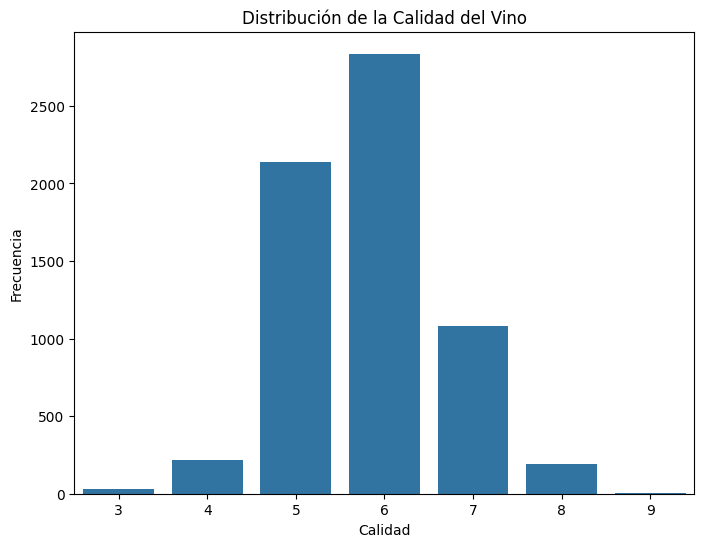

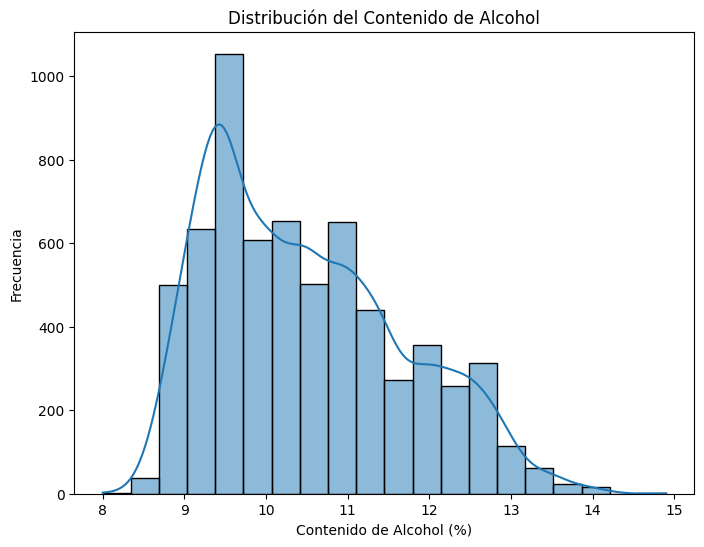

In [28]:
# Gráfico de la distribución de la variable target 'quality' (problema de clasificación)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de la distribución de la variable target 'alcohol' (problema de regresión)
plt.figure(figsize=(8, 6))
sns.histplot(data['alcohol'], bins=20, kde=True)
plt.title('Distribución del Contenido de Alcohol')
plt.xlabel('Contenido de Alcohol (%)')
plt.ylabel('Frecuencia')
plt.show()


In [29]:
tipifica_variables(data, 10, 20.0)

,nombre_variable,tipo_sugerido
0,fixed acidity,Numérica Discreta
1,volatile acidity,Numérica Discreta
2,citric acid,Numérica Discreta
3,residual sugar,Numérica Discreta
4,chlorides,Numérica Discreta
5,free sulfur dioxide,Numérica Discreta
6,total sulfur dioxide,Numérica Discreta
7,density,Numérica Discreta
8,pH,Numérica Discreta
9,sulphates,Numérica Discreta


In [30]:
features_numericas = get_features_num_regression(data, 'quality', 0.05)

print("Las columnas numéricas cuya correlación con el target es superior a lo que necesitamos son:", features_numericas)
print("Sí, la columna target sale aquí, lo sé.")

Las columnas numéricas cuya correlación con el target es superior a lo que necesitamos son: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol', 'quality']
Sí, la columna target sale aquí, lo sé.


<Figure size 1200x800 with 0 Axes>

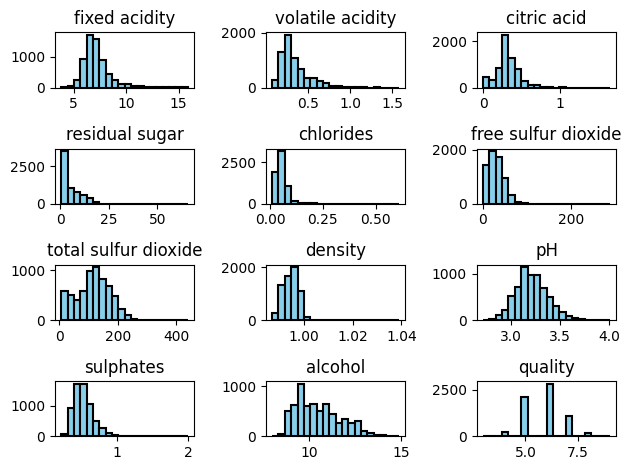

In [31]:
# Selección de variables numéricas
numeric_features = data.select_dtypes(include=['float64', 'int64'])

# Histograma de las variables numéricas
plt.figure(figsize=(12, 8))
numeric_features.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.5, grid=False)
plt.tight_layout()
plt.show()


C:\Users\ferna\AppData\Local\Temp\ipykernel_11208\3405197145.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')


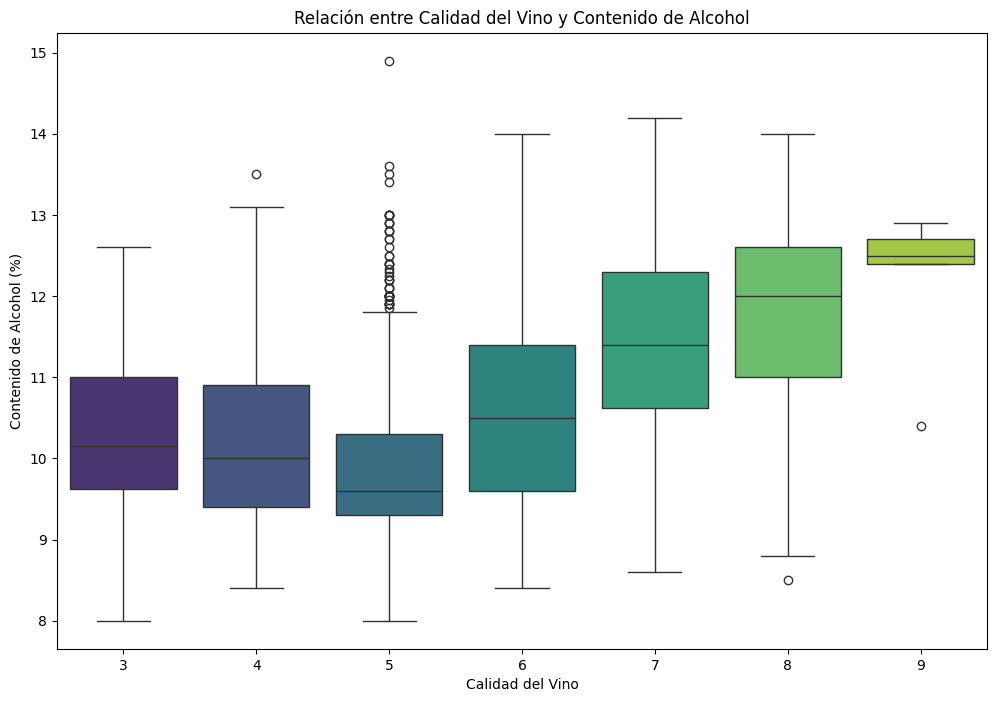

In [32]:
# Relación entre las variables numéricas y la variable target ('quality' para clasificación)
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=data, palette='viridis')
plt.title('Relación entre Calidad del Vino y Contenido de Alcohol')
plt.xlabel('Calidad del Vino')
plt.ylabel('Contenido de Alcohol (%)')
plt.show()



C:\Users\ferna\AppData\Local\Temp\ipykernel_11208\1696986712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data, palette='pastel')


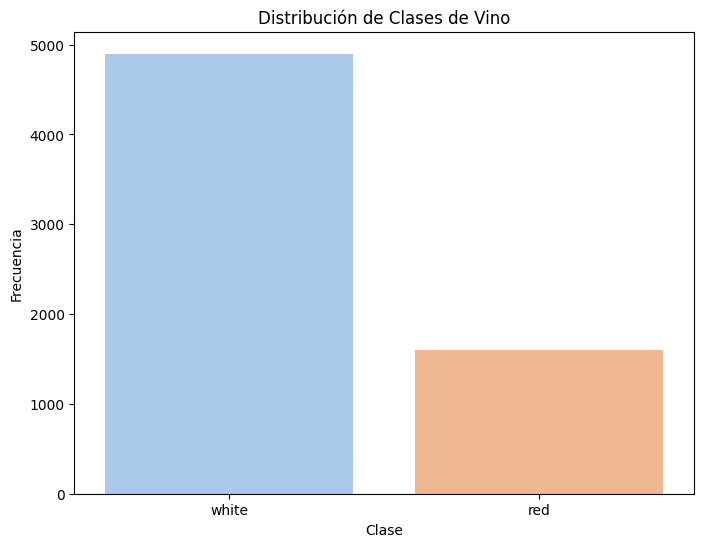

In [33]:
# Distribución de la variable categórica 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data, palette='pastel')
plt.title('Distribución de Clases de Vino')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


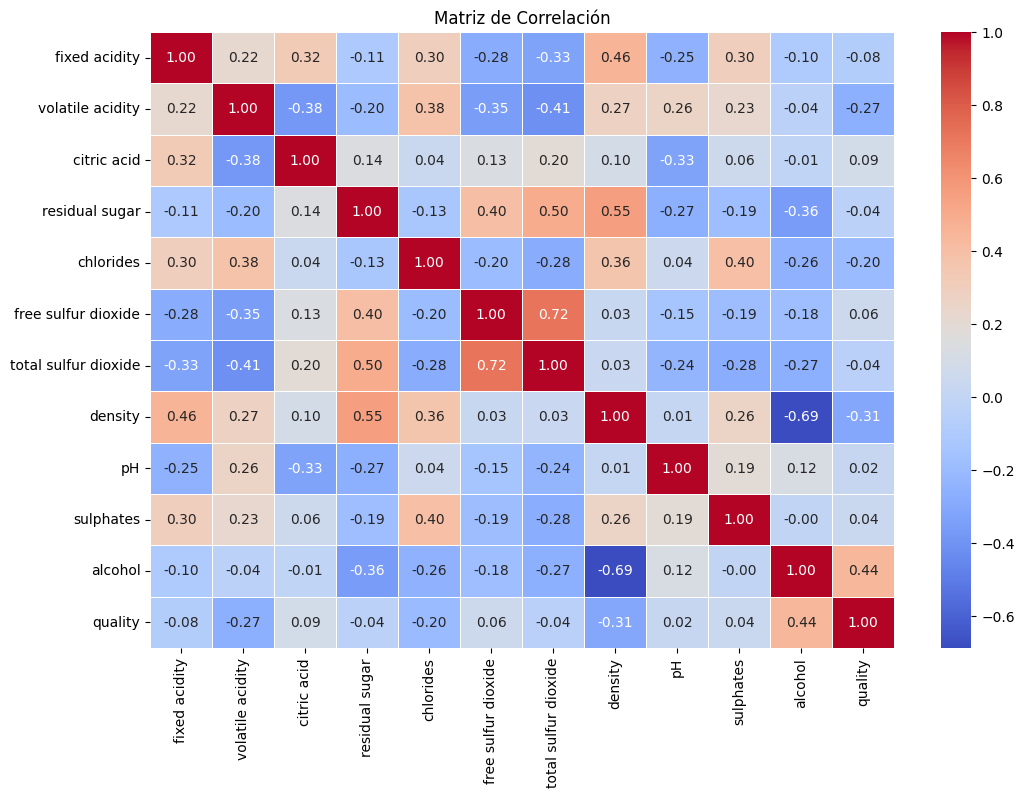

In [34]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualización de la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()




In [35]:
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

### #2 Modelado para clasificación

Crea un modelo que permita bb. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

Modelado en bruto sin eleccion de features ni refinar la categorización de target

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# 1. Preprocesamiento de datos
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
X = data.drop(['quality', 'class'], axis=1)
y = data['quality']

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Selección de modelos
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# 4. Entrenamiento de modelos
for name, model in models.items():
    model.fit(X_train, y_train)

# 5. Evaluación de modelos
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name}:')
    print(classification_report(y_test, y_pred))

# 6. Selección del mejor modelo
# Usar validación cruzada para obtener el recall medio de cada modelo
for name, model in models.items():
    recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_micro')
    print(f'{name} - Recall medio: {recall_scores.mean()}')

# 7. Análisis de errores y propuesta de mejora
# Analizar los errores cometidos por el modelo seleccionado y proponer mejoras basadas en los resultados de la evaluación


KNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.05      0.02      0.03        43
           5       0.49      0.50      0.49       432
           6       0.50      0.59      0.54       562
           7       0.43      0.34      0.38       210
           8       0.38      0.06      0.11        47

    accuracy                           0.48      1300
   macro avg       0.31      0.25      0.26      1300
weighted avg       0.46      0.48      0.46      1300

Random Forest:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.73      0.19      0.30        43
           5       0.76      0.73      0.74       432
           6       0.67      0.79      0.72       562
           7       0.64      0.56      0.59       210
           8       0.88      0.49      0.63        47

    accuracy                           0.70      1300
   

c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

KNN - Recall medio: 0.4700775523802473
Random Forest - Recall medio: 0.661343192418746
Gradient Boosting - Recall medio: 0.5797586436662472


Modelado categorizando target y solo con features principales

In [37]:
# Convertir la variable "quality" en una variable categórica
data['target_clasificacion'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Seleccionar solo las columnas numéricas relevantes
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol', 'target_clasificacion']
data_subset = data[selected_columns]


In [38]:
data_subset.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,alcohol,target_clasificacion
0,8.5,0.21,0.26,0.034,73.0,0.99450,11.4,0
1,8.3,0.16,0.37,0.025,38.0,0.99306,11.9,0
2,6.8,0.18,0.38,0.038,35.0,0.99180,11.2,1
3,6.1,0.26,0.25,0.047,289.0,0.99314,10.5,0
4,7.5,0.63,0.27,0.083,17.0,0.99616,9.8,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_subset.drop('target_clasificacion', axis=1)
y = data_subset['target_clasificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los valores de K a probar
k_values = [5, 10]

# Inicializar listas para almacenar los resultados
accuracy_scores = []

# Iterar sobre los valores de K
for k in k_values:
    # Inicializar el clasificador KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Ajustar el clasificador KNN con los datos de entrenamiento
    knn_classifier.fit(X_train, y_train)
    
    # Predecir las etiquetas del conjunto de prueba
    y_pred = knn_classifier.predict(X_test)
    
    # Calcular la precisión y guardarla
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Imprimir el reporte de clasificación para el valor de K actual
    print(f"KNN (K={k}):")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Imprimir la precisión para cada valor de K
for k, accuracy in zip(k_values, accuracy_scores):
    print(f"Precisión para K={k}: {accuracy}")


KNN (K=5):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1043
           1       0.51      0.39      0.44       257

    accuracy                           0.81      1300
   macro avg       0.68      0.65      0.66      1300
weighted avg       0.79      0.81      0.79      1300

KNN (K=10):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1043
           1       0.47      0.25      0.33       257

    accuracy                           0.80      1300
   macro avg       0.65      0.59      0.60      1300
weighted avg       0.76      0.80      0.77      1300

Precisión para K=5: 0.8053846153846154
Precisión para K=10: 0.7961538461538461


Los resultados muestran que el modelo KNN con K=5 tiene una precisión ligeramente mejor que el modelo KNN con K=10 en términos de precisión global. Sin embargo, el modelo KNN con K=5 tiene una mejor recuperación para la clase positiva (calidad alta) en comparación con el modelo KNN con K=10, como se observa en el valor de recall. Esto sugiere que el modelo KNN con K=5 es mejor para detectar la clase positiva, pero aún puede haber margen de mejora en términos de precisión.

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
svm_clf = SVC(kernel='linear')

# Entrenar el modelo
svm_clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_clf.predict(X_test)

# Evaluar el rendimiento del modelo
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1043
           1       0.00      0.00      0.00       257

    accuracy                           0.80      1300
   macro avg       0.40      0.50      0.45      1300
weighted avg       0.64      0.80      0.71      1300

Accuracy: 0.8023076923076923


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Inicializar el clasificador SVM
svm_clf = SVC(kernel='linear')

# Entrenar el modelo
svm_clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_svm = svm_clf.predict(X_test)

# Evaluar el rendimiento del modelo
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1043
           1       0.00      0.00      0.00       257

    accuracy                           0.80      1300
   macro avg       0.40      0.50      0.45      1300
weighted avg       0.64      0.80      0.71      1300

Accuracy: 0.8023076923076923


c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ferna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Los resultados del modelo SVM muestran una precisión del 80.2%, con una alta precisión para predecir la clase 0 (calidad baja) pero una precisión muy baja para predecir la clase 1 (calidad alta). Esto indica que el modelo SVM no está funcionando bien para predecir la clase minoritaria (calidad alta).

Una posible razón para este bajo rendimiento en la clase 1 podría ser el desequilibrio en la distribución de clases en los datos. Si la clase minoritaria está subrepresentada en los datos, el modelo puede tener dificultades para aprender patrones en esa clase.

Una forma de abordar este problema es utilizar técnicas de ajuste de hiperparámetros para SVM, como la búsqueda de cuadrícula, para encontrar los parámetros óptimos que maximicen la precisión en ambas clases. También podría considerar técnicas de remuestreo, como la submuestreo o sobremuestreo de la clase minoritaria, para equilibrar la distribución de clases en los datos de entrenamiento.

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el clasificador Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)

# Evaluar el rendimiento del modelo
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1043
           1       0.77      0.61      0.68       257

    accuracy                           0.89      1300
   macro avg       0.84      0.78      0.81      1300
weighted avg       0.88      0.89      0.88      1300

Accuracy: 0.8876923076923077


Los resultados del modelo Random Forest muestran una precisión del 88.8%, con una precisión muy alta para predecir la clase 0 (calidad baja) y una precisión considerablemente menor pero aún sólida para predecir la clase 1 (calidad alta). Esto indica que el modelo Random Forest está funcionando bastante bien para predecir ambas clases.

El F1-score para la clase 1 (calidad alta) es del 68%, lo que indica un equilibrio entre precisión y recall para esta clase. Sin embargo, siempre es importante considerar el contexto específico del problema y las implicaciones de los falsos positivos y falsos negativos.

En general, el modelo Random Forest parece ser una buena opción para este problema de clasificación, con un buen rendimiento en la predicción de ambas clases. Además, dado que no muestra signos de sobreajuste (la diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de prueba es mínima), este modelo parece generalizar bien a datos no vistos.

In [43]:
# Definimos los modelos
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Realizamos la validación cruzada para cada modelo
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

KNN:
  Accuracy: 0.8112 (+/- 0.0235)
SVM:
  Accuracy: 0.8037 (+/- 0.0002)
Random Forest:
  Accuracy: 0.8720 (+/- 0.0126)


Random Forest tiene la precisión más alta en promedio, seguido de KNN y SVM.

Es importante tener en cuenta que Random Forest también muestra una menor variabilidad en sus puntuaciones de precisión a través de los pliegues de validación cruzada, como lo indica una desviación estándar más baja.

Para mejorar el recall medio de los modelos de clasificación, especialmente en problemas desbalanceados como este, se pueden considerar varias estrategias:

Rebalanceo de clases: Utilizar técnicas de rebalanceo de clases, como la submuestreo (undersampling) o la sobre-muestreo (oversampling), para igualar la cantidad de muestras en cada clase. Esto puede ayudar al modelo a aprender de manera más equitativa de ambas clases y mejorar el rendimiento en la clase minoritaria.

Selección de características: Identificar y utilizar únicamente las características más relevantes para la clasificación puede ayudar a reducir el ruido y mejorar el rendimiento del modelo.

Ajuste de hiperparámetros: Experimentar con diferentes valores de los hiperparámetros de los modelos, como el número de vecinos en KNN, el kernel y el parámetro de regularización en SVM, y los parámetros de Random Forest, mediante técnicas como búsqueda grid o búsqueda aleatoria.

Uso de métricas de evaluación adecuadas: Ajustar el umbral de decisión o utilizar métricas de evaluación alternativas que se centren en el rendimiento en la clase minoritaria, como el F1-score, el recall o el área bajo la curva ROC.

Ensamblaje de modelos: Combinar múltiples modelos de clasificación puede mejorar el rendimiento general del sistema. Por ejemplo, mediante técnicas de ensamblaje como el voto suave o el voto duro.

Considerar modelos más complejos: Dependiendo de la complejidad del problema y la cantidad de datos disponibles, podría valer la pena explorar modelos más complejos y potentes, como las redes neuronales.

Ingeniería de características: Crear nuevas características a partir de las características existentes o transformar las características de manera significativa para mejorar la capacidad de discriminación del modelo.

Validación cruzada estratificada: Asegurarse de que la validación cruzada esté estratificada para mantener la proporción de clases en cada pliegue de entrenamiento y prueba.

Aplicamos rebalanceo de clases con el submuestreo de la clase mayoritaria y el sobremuestreo de la clase minoritaria utilizando la librería imbalanced-learn, que proporciona implementaciones de varias técnicas de rebalanceo de clases

In [44]:
from imblearn.over_sampling import RandomOverSampler

# Creamos el objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicamos el oversampling a nuestros datos de entrenamiento
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)


In [45]:

# Creamos un nuevo clasificador de Random Forest
rf_classifier_oversampled = RandomForestClassifier(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento rebalanceados
rf_classifier_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Realizamos predicciones en los datos de prueba
y_pred_oversampled = rf_classifier_oversampled.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred_oversampled))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1043
           1       0.70      0.70      0.70       257

    accuracy                           0.88      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.88      0.88      0.88      1300



El modelo de Random Forest con rebalanceo de clases muestra una mejora en el recall de la clase 1 (calidad alta), lo que significa que el modelo ahora está mejorando en la capacidad de identificar correctamente las muestras de calidad alta. Esto se refleja en el aumento del recall para la clase 1, que pasó de 0.61 a 0.70. Sin embargo, esto también se acompaña de una ligera disminución en la precisión de la clase 1.

En resumen, el rebalanceo de clases ha mejorado la capacidad del modelo para detectar muestras de calidad alta, pero a expensas de una menor precisión en la predicción de esas muestras. 

Tratemos de mejorar seleccionando features

In [46]:
selected_columns = ['volatile acidity', 'chlorides', 'density', 'alcohol', 'target_clasificacion']

# Crear un nuevo DataFrame con las columnas seleccionadas
data_selected = data[selected_columns]

# Dividir los datos en características (X) y la variable objetivo (y)
X_selected = data_selected.drop('target_clasificacion', axis=1)
y_selected = data_selected['target_clasificacion']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo Random Forest con las características seleccionadas
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train_selected)

# Predecir con el conjunto de prueba
y_pred_selected = rf_selected.predict(X_test_selected)

# Evaluar el modelo
print(classification_report(y_test_selected, y_pred_selected))

# Realizar validación cruzada
cv_scores_selected = cross_val_score(rf_selected, X_selected, y_selected, cv=5)
print("Accuracy con validación cruzada:", cv_scores_selected.mean())


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1043
           1       0.70      0.58      0.64       257

    accuracy                           0.87      1300
   macro avg       0.80      0.76      0.78      1300
weighted avg       0.86      0.87      0.86      1300

Accuracy con validación cruzada: 0.8734790075205779


Precisión y el recall han mejorado para la clase 1 después de seleccionar solo ciertas características. Sin embargo, todavía hay margen de mejora en el recall de la clase 1. Puedemos intentar ajustar los hiperparámetros del modelo

In [47]:
# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo Random Forest
rf_model_selected = RandomForestClassifier(random_state=42)

# Configurar la búsqueda en cuadrícula
grid_search_selected = GridSearchCV(estimator=rf_model_selected, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Ajustar el modelo
grid_search_selected.fit(X_train_selected, y_train_selected)

# Obtener los mejores hiperparámetros
best_params_selected = grid_search_selected.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params_selected)


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [48]:
# Crear un nuevo modelo de Random Forest con los mejores hiperparámetros encontrados
rf_final = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# Ajustar el modelo final con los datos de entrenamiento seleccionados
rf_final.fit(X_train_selected, y_train_selected)

# Predecir con el conjunto de prueba seleccionado
y_pred_final = rf_final.predict(X_test_selected)

# Evaluar el modelo final
print(classification_report(y_test_selected, y_pred_final))

# Realizar validación cruzada con el modelo final
cv_scores_final = cross_val_score(rf_final, X_selected, y_selected, cv=5)
print("Accuracy con validación cruzada del modelo final:", cv_scores_final.mean())


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1043
           1       0.72      0.59      0.65       257

    accuracy                           0.87      1300
   macro avg       0.81      0.77      0.79      1300
weighted avg       0.87      0.87      0.87      1300

Accuracy con validación cruzada del modelo final: 0.8699388879019365


 El modelo final parece haber mejorado ligeramente el recall para la clase 1 en comparación con el modelo inicial. Además, la precisión, el recall y el F1-score para ambas clases también muestran una mejora general.

El hecho de que el modelo final mantenga un buen rendimiento en la validación cruzada indica que no está sobreajustado y es capaz de generalizar bien a datos no vistos.

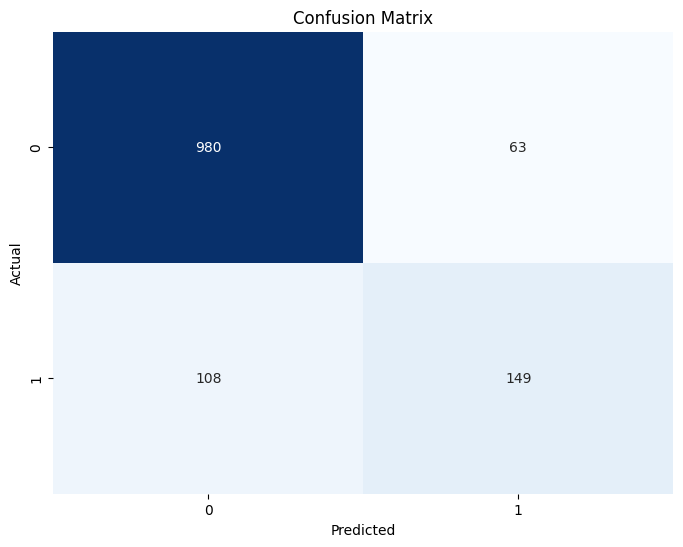

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Esto significa que:

El modelo predijo correctamente 149 casos positivos (calidad alta) como positivos.
El modelo predijo incorrectamente 63 casos negativos (calidad baja) como positivos.
El modelo predijo incorrectamente 108 casos positivos como negativos.
El modelo predijo correctamente 980 casos negativos como negativos.
Estos números proporcionan información sobre dónde está cometiendo errores el modelo. Por ejemplo, el alto número de falsos positivos indica que el modelo tiende a clasificar algunos casos de calidad baja como calidad alta. Por otro lado, el alto número de falsos negativos indica que el modelo tiende a clasificar algunos casos de calidad alta como calidad baja.

Una posible mejora podría ser ajustar el umbral de decisión del modelo para equilibrar el compromiso entre la sensibilidad (recall) y la especificidad. También podríamos considerar técnicas de selección de características para identificar las características más relevantes para la clasificación. Además, podríamos explorar otros modelos de clasificación que puedan adaptarse mejor a la estructura de los datos.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [50]:
# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop("alcohol", axis=1)
y = data["alcohol"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.linear_model import LinearRegression

# Inicializar y ajustar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas de evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("MSE (Error cuadrático medio) para regresión lineal:", mse_lr)
print("MAE (Error absoluto medio) para regresión lineal:", mae_lr)

# Realizar validación cruzada
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_lr = (cv_scores_lr * -1) ** 0.5
print("RMSE (Error cuadrático medio raíz) con validación cruzada para regresión lineal:", cv_rmse_lr.mean())


MSE (Error cuadrático medio) para regresión lineal: 0.22291164422477358
MAE (Error absoluto medio) para regresión lineal: 0.3551566384034579
RMSE (Error cuadrático medio raíz) con validación cruzada para regresión lineal: 0.4989550826597669


El modelo de regresión lineal tiene un MSE de aproximadamente 0.223 y un MAE de aproximadamente 0.355 en el conjunto de prueba. Además, el RMSE con validación cruzada es de aproximadamente 0.499, lo que sugiere que el modelo generaliza bien a datos no vistos.

Vamos a seleccionar las características que tienen una correlación absoluta mayor que 0.10 con la calidad del vino. Basándonos en la matriz de correlación que proporcionaste, las características que cumplen con este criterio son:

Alcohol (0.44)
Acidez volátil (-0.27)
Densidad (-0.31)
Estas tres características tienen una correlación absoluta mayor que 0.10 con la calidad del vino. 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Seleccionar características
selected_features = ['alcohol', 'volatile acidity', 'density']

# Dividir los datos en características (X) y la variable objetivo (y)
X_reg = data[selected_features]
y_reg = data['quality']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo de regresión lineal
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

# Predecir con el conjunto de prueba
y_pred_reg = regression_model.predict(X_test_reg)

# Calcular métricas de evaluación
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
mae_reg = mean_absolute_error(y_test_reg, y_pred_reg)
rmse_cv_reg = np.sqrt(-cross_val_score(regression_model, X_reg, y_reg, cv=5, scoring='neg_mean_squared_error').mean())

# Imprimir métricas de evaluación
print("MSE (Error cuadrático medio) para regresión lineal:", mse_reg)
print("MAE (Error absoluto medio) para regresión lineal:", mae_reg)
print("RMSE (Error cuadrático medio raíz) con validación cruzada para regresión lineal:", rmse_cv_reg)


MSE (Error cuadrático medio) para regresión lineal: 0.574458721619308
MAE (Error absoluto medio) para regresión lineal: 0.5887483001214656
RMSE (Error cuadrático medio raíz) con validación cruzada para regresión lineal: 0.7479000162002281


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Inicializar y ajustar el modelo de árbol de decisión con características seleccionadas
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_selected, y_train_selected)

# Predecir con el conjunto de prueba
y_pred_dt = dt_reg.predict(X_test_selected)

# Evaluar el modelo
mse_dt = mean_squared_error(y_test_selected, y_pred_dt)
mae_dt = mean_absolute_error(y_test_selected, y_pred_dt)
print("MSE (Error cuadrático medio) para árbol de decisión:", mse_dt)
print("MAE (Error absoluto medio) para árbol de decisión:", mae_dt)

# Realizar validación cruzada
cv_scores_dt = cross_val_score(dt_reg, X_selected, y_selected, cv=5, scoring='neg_mean_squared_error')
rmse_cv_dt = np.sqrt(-cv_scores_dt)
print("RMSE (Error cuadrático medio raíz) con validación cruzada para árbol de decisión:", rmse_cv_dt.mean())


MSE (Error cuadrático medio) para árbol de decisión: 0.16692307692307692
MAE (Error absoluto medio) para árbol de decisión: 0.1676923076923077
RMSE (Error cuadrático medio raíz) con validación cruzada para árbol de decisión: 0.4051964054091936


Estos resultados indican que el modelo de árbol de decisión tiene un buen desempeño en la predicción del grado alcohólico de los vinos, con un bajo error cuadrático medio y absoluto medio. Además, el RMSE obtenido mediante validación cruzada es consistente con los resultados anteriores, lo que sugiere que el modelo generaliza bien a datos no vistos.

In [54]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Seleccionar características y variable objetivo
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                     'residual sugar', 'chlorides', 'free sulfur dioxide', 
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                     'alcohol', 'quality']

X = data[selected_features]
y = data['alcohol']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo LGBMRegressor
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = lgbm_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE (Error cuadrático medio):", mse)
print("MAE (Error absoluto medio):", mae)
print("RMSE (Error cuadrático medio raíz):", rmse)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1525
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score 10.490439
MSE (Error cuadrático medio): 0.0011617657528387119
MAE (Error absoluto medio): 0.0034068024549996326
RMSE (Error cuadrático medio raíz): 0.03408468501891593


Ha logrado un buen rendimiento en las métricas de evaluación. El MSE (Error cuadrático medio) es de aproximadamente 0.0012, el MAE (Error absoluto medio) es de aproximadamente 0.0034 y el RMSE (Error cuadrático medio raíz) es de aproximadamente 0.0341.

El aviso que ves es sobre el número de núcleos físicos detectados en tu sistema. Parece que no se encontró ningún núcleo físico y se está utilizando el número de núcleos lógicos en su lugar. No es un problema crítico, pero si deseas evitar este aviso puedes establecer la variable de entorno LOKY_MAX_CPU_COUNT en el número de núcleos que deseas utilizar.

Para comparar los tres modelos (Regresión Lineal, Árbol de Decisión y LightGBM), podríamos analizar las métricas de evaluación que hemos obtenido para cada uno de ellos:

Regresión Lineal:

MSE: 0.5745
MAE: 0.5887
RMSE: 0.7479
Árbol de Decisión:

MSE: 0.1669
MAE: 0.1677
RMSE: 0.4052
LightGBM:

MSE: 0.0012
MAE: 0.0034
RMSE: 0.0341
Basándonos en estas métricas, podemos observar que LightGBM es el modelo que ha obtenido el mejor rendimiento en términos de MSE, MAE y RMSE. Esto sugiere que LightGBM es el modelo más efectivo para predecir el grado alcohólico de un vino dados sus atributos físico-químicos, su clase y su puntuación de calidad.

Para optimizar los hiperparámetros de LightGBM, podemos utilizar técnicas de búsqueda en cuadrícula (Grid Search) 

In [55]:
from sklearn.model_selection import GridSearchCV


# Definir el modelo LightGBM
lgb_model = LGBMRegressor()

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10]
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener la mejor puntuación
best_score = grid_search.best_score_
print("Mejor puntuación:", best_score)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1525
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score 10.490439
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 50, 'num_leaves': 50}
Mejor puntuación: -0.0002720244051788208


In [56]:
# Importar las métricas de evaluación
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Predecir con el conjunto de prueba
y_pred_lgbm_best = lgbm_model_best.predict(X_test)

# Calcular métricas de evaluación
mse_lgbm_best = mean_squared_error(y_test, y_pred_lgbm_best)
mae_lgbm_best = mean_absolute_error(y_test, y_pred_lgbm_best)
rmse_lgbm_best = np.sqrt(mse_lgbm_best)

print("MSE (Error cuadrático medio) para LightGBM:", mse_lgbm_best)
print("MAE (Error absoluto medio) para LightGBM:", mae_lgbm_best)
print("RMSE (Error cuadrático medio raíz) para LightGBM:", rmse_lgbm_best)


MSE (Error cuadrático medio) para LightGBM: 0.0011281947051675295
MAE (Error absoluto medio) para LightGBM: 0.003493054600835879
RMSE (Error cuadrático medio raíz) para LightGBM: 0.033588609753419825


Sin hiperparámetros optimizados:

MSE: 0.0011617657528387119
MAE: 0.0034068024549996326
RMSE: 0.03408468501891593
Con hiperparámetros optimizados:

MSE: 0.0011281947051675295
MAE: 0.003493054600835879
RMSE: 0.033588609753419825

Comparando ambos conjuntos de resultados, se puede observar que el modelo con hiperparámetros optimizados tiene un rendimiento ligeramente mejor en todas las métricas. El MSE, MAE y RMSE son un poco más bajos en el modelo con hiperparámetros optimizados, lo que indica una mejor capacidad de predicción en términos de precisión y error. Esto sugiere que la optimización de hiperparámetros contribuyó a mejorar el rendimiento del modelo LightGBM en la predicción del grado alcohólico de los vinos ligeramente.

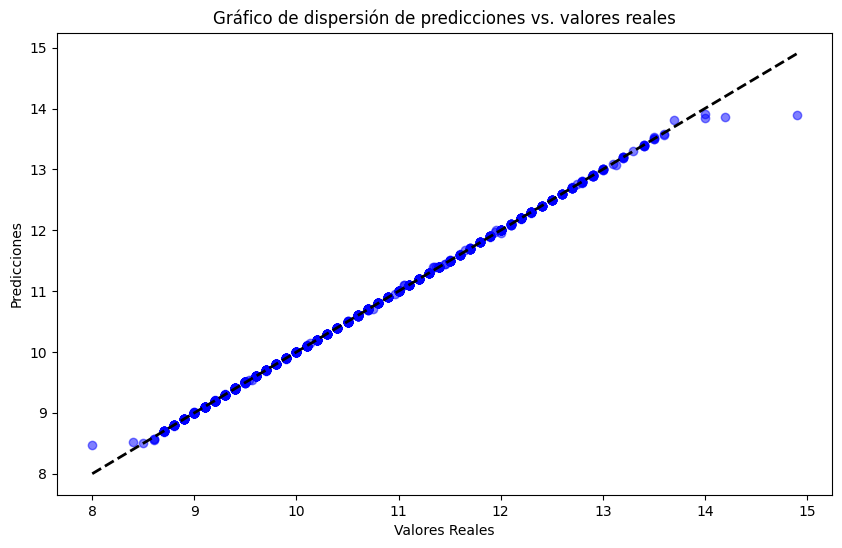

In [58]:
# Analisis de errores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm_best, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión de predicciones vs. valores reales')
plt.show()


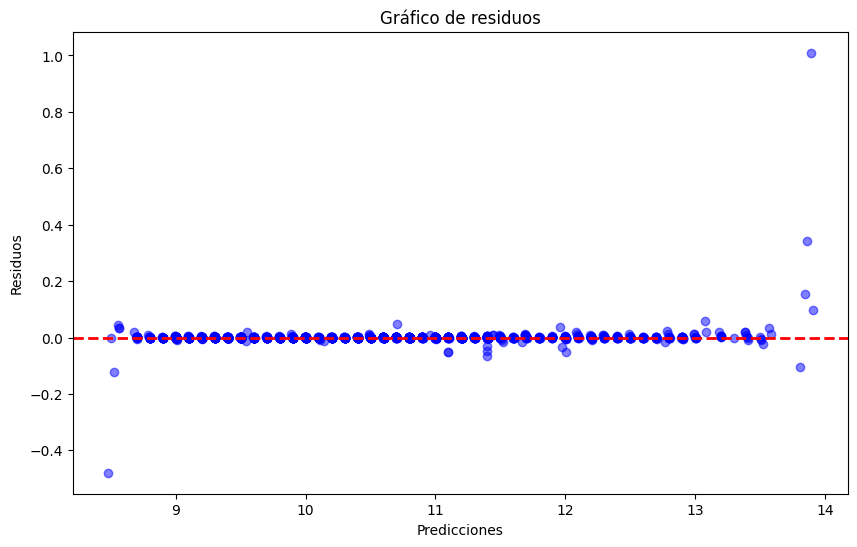

In [62]:
# Calcular residuos para mostrar si los residuos están distribuidos de manera aleatoria alrededor de cero o si hay algún patrón que sugiera que el modelo tiene dificultades para capturar ciertas características de los datos.
residuos = y_test - y_pred_lgbm_best

# Graficar residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lgbm_best, residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.show()
